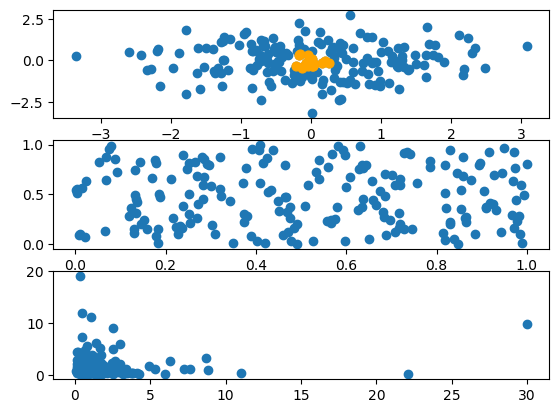

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
%matplotlib inline
norm = np.random.normal(size=(2,200))
x=norm[0,]
y=norm[1,]
uni = np.random.uniform(size=(2,200))
log = np.random.lognormal(size=(2,200))
epsilon = 0.1
mask = np.abs(x**2+1/3*y**2) < epsilon #Маска для распределения Капчинского
plt.subplot(3, 1, 1)
plt.scatter(norm[0, ], norm[1, ])
plt.scatter(x[mask], y[mask], color='orange', s=40, marker='o')
plt.subplot(3, 1, 2)
plt.scatter(uni[0, ], uni[1, ])
plt.subplot(3, 1, 3)
plt.scatter(log[0, ], log[1, ])
plt.show

In [3]:
import numpy as np
import random as rnd
import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')

epsx = rnd.uniform(1,3)
betx = rnd.uniform(0.7,1)
alfx = 2.5
gamx = (1+alfx**2)/betx

epsy = rnd.uniform(6,9)
bety = rnd.uniform(1.3,2)
alfy = -1.9
gamy = (1+alfy**2)/bety

x_max  = np.sqrt(epsx*betx)
xp_max = np.sqrt(epsx*gamx)
y_max  = np.sqrt(epsy*bety)
yp_max = np.sqrt(epsy*gamy)

print(F"x_max = {x_max:10.5f}, x'_max = {xp_max:10.5f}")
print(F"y_max = {y_max:10.5f}, y'_max = {yp_max:10.5f}")
betxn = betx / epsx
alfxn = alfx / epsx
gamxn = gamx / epsx

betyn = bety / epsy
alfyn = alfy / epsy
gamyn = gamy / epsy

Qx = np.array([[gamxn,alfxn],[alfxn,betxn]])
Lx = np.linalg.cholesky(Qx)
Mx = np.linalg.inv(np.matrix.transpose(Lx))

Qy = np.array([[gamyn,alfyn],[alfyn,betyn]])
Ly = np.linalg.cholesky(Qy)
My = np.linalg.inv(np.matrix.transpose(Ly))

ang = np.linspace(0,2*np.pi,100)
XO = [[np.cos(a),np.sin(a)] for a in ang]

Xx = [np.matmul(Mx,XO[k]) for k in range(len(XO))]
Xy = [np.matmul(My,XO[k]) for k in range(len(XO))]

xxdim=hv.Dimension("x", range=(-6, 6))
xpdim=hv.Dimension("x'", range=(-6, 6))
yydim=hv.Dimension("y", range=(-6, 6))
ypdim=hv.Dimension("y'", range=(-6, 6))

Sx = hv.Curve((Xx)).redim(x=xxdim, y=xpdim).opts(show_grid=True, color="red")
Sy = hv.Curve((Xy)).redim(x=yydim, y=ypdim).opts(show_grid=True, color="red")
Sx+Sy
Np = 2000 # number of points
x1 = np.random.normal(loc=0.0, scale=1.0, size=Np)
x2 = np.random.normal(loc=0.0, scale=1.0, size=Np)
x3 = np.random.normal(loc=0.0, scale=1.0, size=Np)
x4 = np.random.normal(loc=0.0, scale=1.0, size=Np)

dim_x1 = hv.Dimension('x1', label='$x_1$', range=(-3,+3))
dim_x2 = hv.Dimension('x2', label='$x_2$', range=(-3,+3))
dim_x3 = hv.Dimension('x3', label='$x_3$', range=(-3,+3))
dim_x4 = hv.Dimension('x4', label='$x_4$', range=(-3,+3))

%opts Scatter [show_grid=True] (s=5.0)

Sc1 = hv.Scatter((x1,x2)).redim(x=dim_x1,y=dim_x2)
Sc2 = hv.Scatter((x3,x2)).redim(x=dim_x3,y=dim_x2)
Sc1+Sc2
n = np.sqrt(x1*x1 + x2*x2 + x3*x3 + x4*x4)
x1 = x1/n
x2 = x2/n
x3 = x3/n
x4 = x4/n
Sc1 = hv.Scatter((x1,x2)).redim(x=dim_x1,y=dim_x2)
Sc2 = hv.Scatter((x3,x2)).redim(x=dim_x3,y=dim_x2)
Sc1+Sc2
Q = np.array([[gamxn,alfxn,0,0],[alfxn,betxn,0,0],[0,0,gamyn,alfyn],[0,0,alfyn,betyn]])
L = np.linalg.cholesky(Q)
M = np.linalg.inv(np.matrix.transpose(L))
print(M)
XO4 = np.array([[x1[k],x2[k],x3[k],x4[k]] for k in range(Np)])
X = [np.matmul(M,XO4[k]) for k in range(Np)]
xx = np.array([X[k][0] for k in range(Np)])
xp = np.array([X[k][1] for k in range(Np)])
yy = np.array([X[k][2] for k in range(Np)])
yp = np.array([X[k][3] for k in range(Np)])

SR1 = hv.Scatter((xx,xp)).redim(x=xxdim, y=xpdim)
SR2 = hv.Scatter((yy,yp)).redim(x=yydim, y=ypdim)
SR3 = hv.Scatter((xx,yy)).redim(x=xxdim, y=yydim)

Mxy = np.array([[np.sqrt(epsx*betx),0],[0,np.sqrt(epsy*bety)]])
Xxy = [np.matmul(Mxy,XO[k]) for k in range(len(XO))]
Sxy = hv.Curve((Xxy)).redim(x=xxdim, y=yydim).opts(show_grid=True, color="red")

Sx*SR1+Sy*SR2+Sxy*SR3
midx2   = np.sum(xx*xx)/Np
midx2_t = epsx*betx/4

midxp2   = np.sum(xp*xp)/Np
midxp2_t = epsx*gamx/4

midxxp   = np.sum(xx*xp)/Np
midxxp_t = -epsx*alfx/4

print(F"вычисление <x^2>  = {midx2:10.5f}, теория <x^2>  = {midx2_t:10.5f}")
print(F"вычисление <x'^2> = {midxp2:10.5f}, теория <x'^2> = {midxp2_t:10.5f}")
print(F"вычисление <xx'>  = {midxxp:10.5f}, теория <xx'>  = {midxxp_t:10.5f}")

eps_rmsx = np.sqrt(midx2*midxp2-midxxp**2)
eps_rmsx4= 4*eps_rmsx
print(F"вычисление 4*eps_rms_x  = {eps_rmsx4:10.5f}, eps_x  = {epsx:10.5f}")
midy2   = np.sum(yy*yy)/Np
midy2_t = epsy*bety/4

midyp2   = np.sum(yp*yp)/Np
midyp2_t = epsy*gamy/4

midyyp   = np.sum(yy*yp)/Np
midyyp_t = -epsy*alfy/4

print(F"вычисление <y^2>  = {midy2:10.5f}, теория <y^2>  = {midy2_t:10.5f}")
print(F"вычисление <y'^2> = {midyp2:10.5f}, теория <y'^2> = {midyp2_t:10.5f}")
print(F"вычисление <yy'>  = {midyyp:10.5f}, теория <yy'>  = {midyyp_t:10.5f}")

eps_rmsy = np.sqrt(midy2*midyp2-midyyp**2)
eps_rmsy4= 4*eps_rmsy
print(F"вычисление 4*eps_rms_y  = {eps_rmsy4:10.5f}, eps_y  = {epsy:10.5f}")

<class 'ModuleNotFoundError'>: No module named 'holoviews'